## Sales Data Analysis for an E-commerce Company

### Scenario:
You’ve joined a growing e-commerce company as a junior data analyst. Your manager has shared the last year's sales data and asked you to prepare a data analysis report. The company wants to understand how different products and regions are performing and where to focus marketing efforts next quarter.



Import necessary third parties

In [25]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [26]:
#adding the sales.csv file for analysis
df = pd.read_csv("../data/sales.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [27]:
# clean the dataset
df_cleaned = df.drop(["Row ID","Ship Mode","Postal Code"], axis=1)

In [28]:
#Info of the dataset
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Customer ID    9800 non-null   object 
 4   Customer Name  9800 non-null   object 
 5   Segment        9800 non-null   object 
 6   Country        9800 non-null   object 
 7   City           9800 non-null   object 
 8   State          9800 non-null   object 
 9   Region         9800 non-null   object 
 10  Product ID     9800 non-null   object 
 11  Category       9800 non-null   object 
 12  Sub-Category   9800 non-null   object 
 13  Product Name   9800 non-null   object 
 14  Sales          9800 non-null   float64
dtypes: float64(1), object(14)
memory usage: 1.1+ MB


In [29]:
# Convert 'Order Date' to datetime
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], format='%d/%m/%Y')

# Convert 'Ship Date' to datetime
df_cleaned['Ship Date'] = pd.to_datetime(df_cleaned['Ship Date'], format='%d/%m/%Y')

In [30]:
#checking the updated dataset info
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Customer ID    9800 non-null   object        
 4   Customer Name  9800 non-null   object        
 5   Segment        9800 non-null   object        
 6   Country        9800 non-null   object        
 7   City           9800 non-null   object        
 8   State          9800 non-null   object        
 9   Region         9800 non-null   object        
 10  Product ID     9800 non-null   object        
 11  Category       9800 non-null   object        
 12  Sub-Category   9800 non-null   object        
 13  Product Name   9800 non-null   object        
 14  Sales          9800 non-null   float64       
dtypes: datetime64[ns](2),

In [31]:
#checking duplicated values
df_cleaned.duplicated() == True

0       False
1       False
2       False
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Length: 9800, dtype: bool

In [32]:
#Extracting month and year from Order date
df_cleaned["Order Month"] = df_cleaned["Order Date"].dt.month
df_cleaned["Order Year"] = df_cleaned["Order Date"].dt.year

#Extracting month and year from Ship date
df_cleaned["Ship Month"] = df_cleaned["Ship Date"].dt.month
df_cleaned["Ship Year"] = df_cleaned["Ship Date"].dt.year

df_cleaned.head()

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Month,Order Year,Ship Month,Ship Year
0,CA-2017-152156,2017-11-08,2017-11-11,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11,2017,11,2017
1,CA-2017-152156,2017-11-08,2017-11-11,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11,2017,11,2017
2,CA-2017-138688,2017-06-12,2017-06-16,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,6,2017,6,2017
3,US-2016-108966,2016-10-11,2016-10-18,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10,2016,10,2016
4,US-2016-108966,2016-10-11,2016-10-18,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10,2016,10,2016


In [33]:
#checking the monthly order performance
monthly_order_performance = df_cleaned.groupby(["Order Year", "Order Month"])["Sales"].sum()

print(monthly_order_performance)

Order Year  Order Month
2015        1               14205.7070
            2                4519.8920
            3               55205.7970
            4               27906.8550
            5               23644.3030
            6               34322.9356
            7               33781.5430
            8               27117.5365
            9               81623.5268
            10              31453.3930
            11              77907.6607
            12              68167.0585
2016        1               18066.9576
            2               11951.4110
            3               32339.3184
            4               34154.4685
            5               29959.5305
            6               23599.3740
            7               28608.2590
            8               36818.3422
            9               63133.6060
            10              31011.7375
            11              75249.3995
            12              74543.6012
2017        1               18542.4910
 

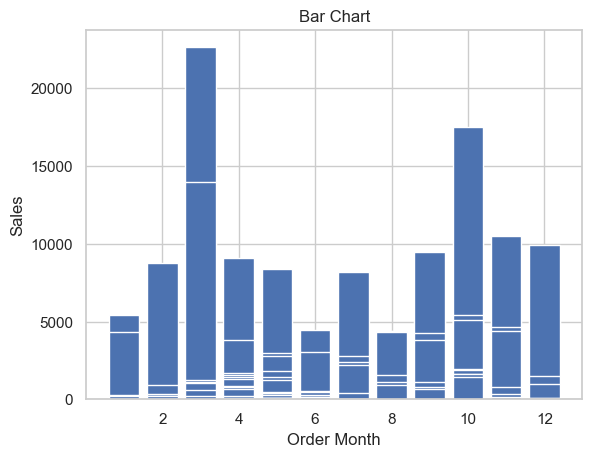

In [34]:
# Bar chart with Order Month against sales
plt.bar(df_cleaned['Order Month'], df_cleaned['Sales'])
 
plt.title("Bar Chart")
 
# Setting the X and Y labels
plt.xlabel('Order Month')
plt.ylabel('Sales')
 
# Adding the legends
plt.show()

In [35]:
#gettng data of product sales
product_sales = df.groupby('Product Name')['Sales'].sum()

sorted_products = product_sales.sort_values(ascending=False)
top_10_products = sorted_products.head(10)
print(top_10_products)


Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64


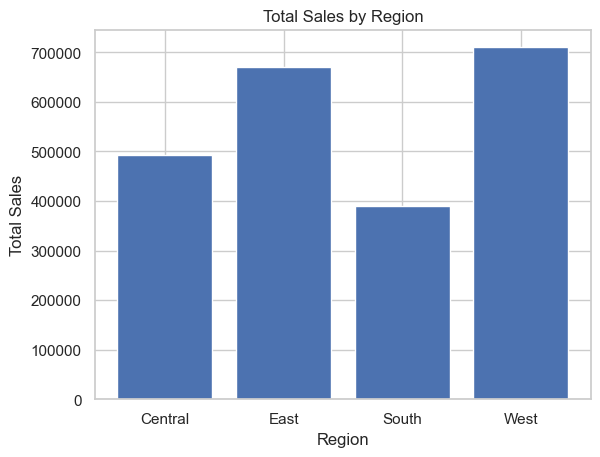

In [36]:
#getting the region sales data
region_sales = df_cleaned.groupby('Region')['Sales'].sum()
print(region_sales)

plt.bar(region_sales.index, region_sales.values)

plt.title("Total Sales by Region")
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


In [37]:
#top and least category and sub-category data
category_sales = df_cleaned.groupby('Category')['Sales'].sum()
sub_category_sales = df_cleaned.groupby('Sub-Category')['Sales'].sum()

top_categories = category_sales.nlargest()
least_categories = category_sales.nsmallest()

top_sub_categories = category_sales.nlargest()
least_sub_categories = category_sales.nsmallest()

print("Top Categories: ", top_categories)
print("Least Categories: ", least_categories)
print("Top Sub-Categories: ", top_sub_categories)
print("Least Sub-Categories: ", least_sub_categories)

Top Categories:  Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64
Least Categories:  Category
Office Supplies    705422.3340
Furniture          728658.5757
Technology         827455.8730
Name: Sales, dtype: float64
Top Sub-Categories:  Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64
Least Sub-Categories:  Category
Office Supplies    705422.3340
Furniture          728658.5757
Technology         827455.8730
Name: Sales, dtype: float64


## 📘 Summary & Insights

### Key Findings
- The dataset initially had formatting issues (e.g., incorrect data types or date formats), which were cleaned and standardized.
- **March** recorded the highest total sales among all months, indicating a strong seasonal trend.
- The **West region** contributed the most to overall sales, totaling ₹710,219.68.
- The top-performing category was **Technology**, with total sales of ₹827,455.87 — making it a key revenue driver.

### Recommendations
- Consider exploring why March consistently sees high sales — could be an opportunity for seasonal promotions.
- Allocate more marketing resources to the **West region**, as it shows strong sales performance.
- Since **Technology** is the leading category, focus on expanding product offerings, bundles, or promotions in this category.



Have questions or suggestions? Feel free to reach out via mail: chauhannisha150@gmail.com, linkedin: https://www.linkedin.com/in/nishachauhan150/]!
